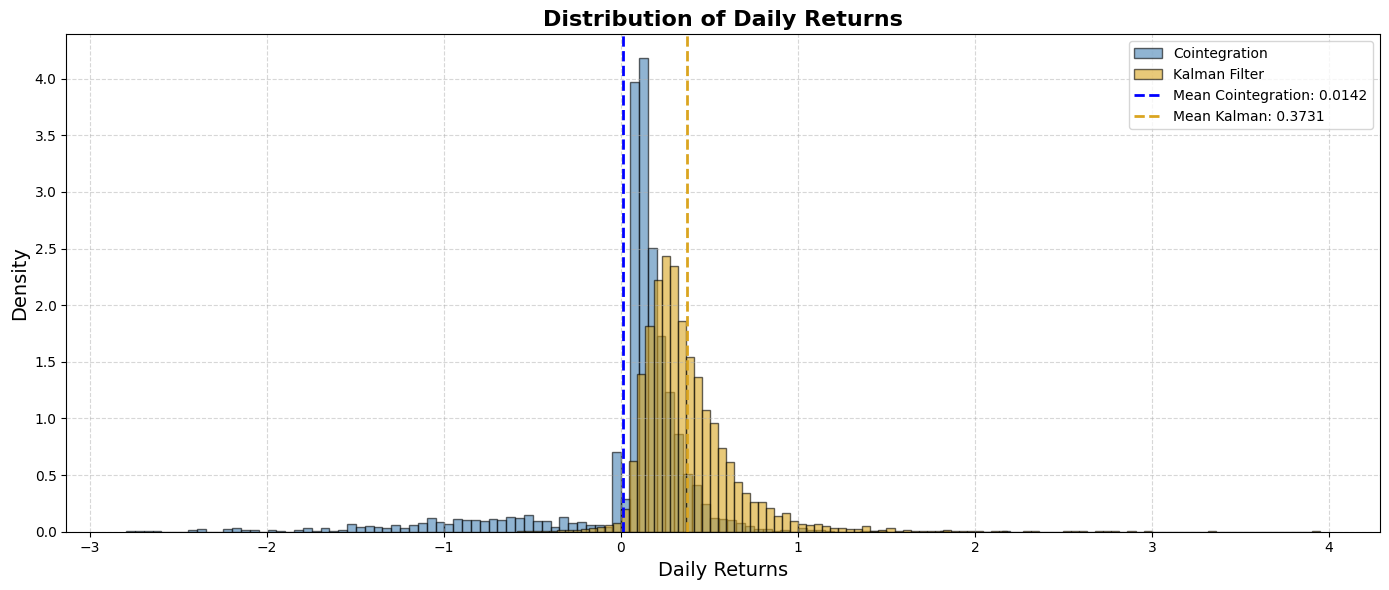

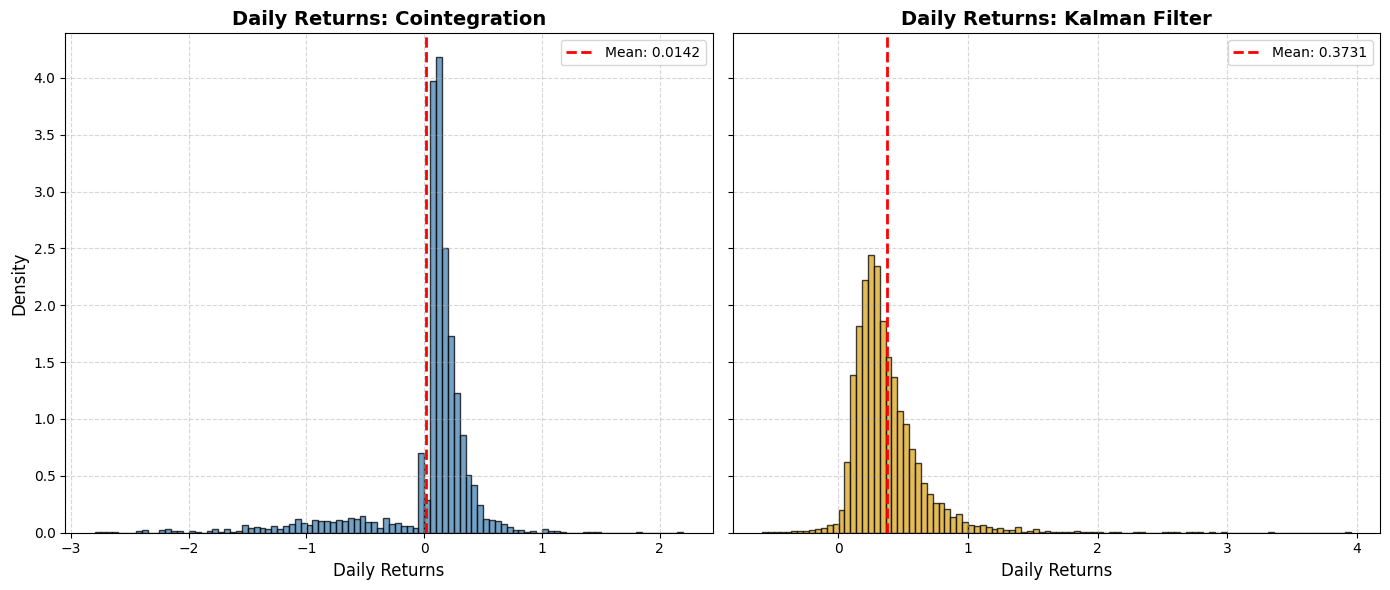

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
backtest_result_1990_2025_cointegration = pd.read_csv("C:/Users/adamt/OneDrive/Desktop/Jakub/masterThesis/backtestfrom1990to2025_correct_result.csv", index_col=0)
backtest_result_1990_2025_kalman = pd.read_csv("C:/Users/adamt/OneDrive/Desktop/Jakub/masterThesis/backtestfrom1990to2025_result_kalman.csv", index_col=0)

# Compute daily returns
daily_returns_cointegration = backtest_result_1990_2025_cointegration.sum(axis=1)
daily_returns_kalman = backtest_result_1990_2025_kalman.sum(axis=1)
daily_returns_cointegration_mean, daily_returns_kalman_mean = daily_returns_cointegration.mean(), daily_returns_kalman.mean()
# Filter out zero returns and convert index
daily_returns_cointegration = daily_returns_cointegration[daily_returns_cointegration != 0]
daily_returns_kalman = daily_returns_kalman[daily_returns_kalman != 0]
daily_returns_cointegration.index = pd.to_datetime(daily_returns_cointegration.index)
daily_returns_kalman.index = pd.to_datetime(daily_returns_kalman.index)

# Side-by-side histograms
plt.figure(figsize=(14, 6))
plt.hist(daily_returns_cointegration, bins=100, color="steelblue", edgecolor="black", alpha=0.6, label='Cointegration', density=True)
plt.hist(daily_returns_kalman, bins=100, color="goldenrod", edgecolor="black", alpha=0.6, label='Kalman Filter', density=True)

plt.xlabel("Daily Returns", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of Daily Returns", fontsize=16, fontweight="bold")
plt.axvline(daily_returns_cointegration_mean, color='blue', linestyle='dashed', linewidth=2, label=f"Mean Cointegration: {daily_returns_cointegration_mean:.4f}")
plt.axvline(daily_returns_kalman_mean, color='goldenrod', linestyle='dashed', linewidth=2, label=f"Mean Kalman: {daily_returns_kalman_mean:.4f}")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt

# Side-by-side histograms using subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram for Cointegration
axes[0].hist(daily_returns_cointegration, bins=100, color="steelblue", edgecolor="black", alpha=0.75, density=True)
axes[0].axvline(daily_returns_cointegration_mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {daily_returns_cointegration_mean:.4f}")
axes[0].set_title("Daily Returns: Cointegration", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Daily Returns", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# Histogram for Kalman Filter
axes[1].hist(daily_returns_kalman, bins=100, color="goldenrod", edgecolor="black", alpha=0.75, density=True)
axes[1].axvline(daily_returns_kalman_mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {daily_returns_kalman_mean:.4f}")
axes[1].set_title("Daily Returns: Kalman Filter", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Daily Returns", fontsize=12)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


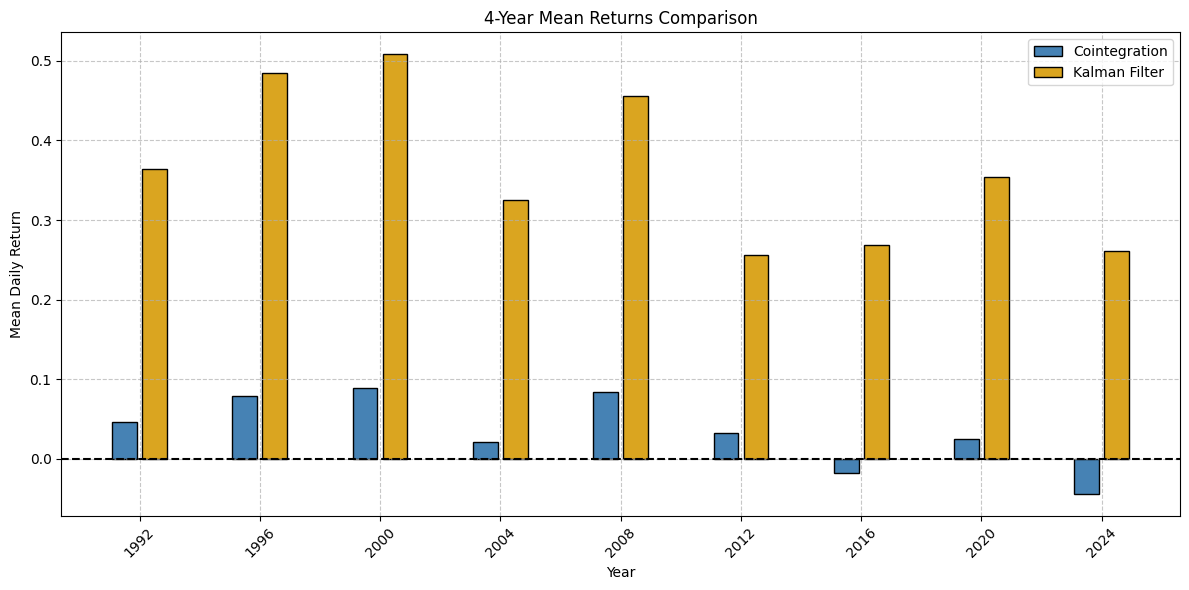

In [54]:

# Filter for dates before 2025-01-01
#daily_returns_cointegration = daily_returns_cointegration[daily_returns_cointegration.index < "2025-01-01"]
#daily_returns_kalman = daily_returns_kalman[daily_returns_kalman.index < "2025-01-01"]

# Resample to 4-year periods
yearly_returns_cointegration = daily_returns_cointegration.resample("4YS").mean()
yearly_returns_kalman = daily_returns_kalman.resample("4YS").mean()

# Grouped bar chart
plt.figure(figsize=(12, 6))
width = 300  # bar width

# Align bars by shifting one slightly left and the other right
bar_positions = yearly_returns_cointegration.index
plt.bar(bar_positions - pd.DateOffset(days=365*0.5), yearly_returns_cointegration.values, width=width, color='steelblue', edgecolor='black', label='Cointegration')
plt.bar(bar_positions + pd.DateOffset(days=365*0.5), yearly_returns_kalman.values, width=width, color='goldenrod', edgecolor='black', label='Kalman Filter')

plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Year")
plt.ylabel("Mean Daily Return")
plt.title("4-Year Mean Returns Comparison")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()